<a href="https://colab.research.google.com/github/ashifka/ashif/blob/main/AshifKA(Credit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Loading the dataset

In [2]:
data = pd.read_csv('/content/credit.csv')

# Preprocessing and Exploratory Data Analysis

## **Data Understanding**

In [3]:
data.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
5,5639,3392,6,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,270.0,No,49.574949,21.465380,High_spent_Medium_value_payments,340.479212,Good
6,5640,3392,7,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,22.537593,271.0,No,49.574949,21.465380,Low_spent_Small_value_payments,244.565317,Good
7,5641,3392,8,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,23.933795,272.0,No,49.574949,21.465380,High_spent_Medium_value_payments,358.124168,Standard
8,5646,8625,1,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,24.464031,319.0,No,18.816215,39.684018,Low_spent_Small_value_payments,470.690627,Standard
9,5647,8625,2,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,38.550848,320.0,No,18.816215,39.684018,High_spent_Large_value_payments,484.591214,Good


In [4]:
data.shape

(100000, 28)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [6]:
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [7]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

## **Data Cleaning and Visualisation**

In [8]:
data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [9]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
outliers = {}
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)].shape[0]

print("\nOutliers per numeric column:")
print(outliers)


Outliers per numeric column:
{'ID': 0, 'Customer_ID': 0, 'Month': 0, 'Age': 0, 'SSN': 0, 'Annual_Income': 2000, 'Monthly_Inhand_Salary': 2017, 'Num_Bank_Accounts': 0, 'Num_Credit_Card': 0, 'Interest_Rate': 0, 'Num_of_Loan': 0, 'Delay_from_due_date': 4002, 'Num_of_Delayed_Payment': 0, 'Changed_Credit_Limit': 579, 'Num_Credit_Inquiries': 787, 'Outstanding_Debt': 5272, 'Credit_Utilization_Ratio': 4, 'Credit_History_Age': 0, 'Total_EMI_per_month': 5044, 'Amount_invested_monthly': 4464, 'Monthly_Balance': 7400}


In [13]:
data['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

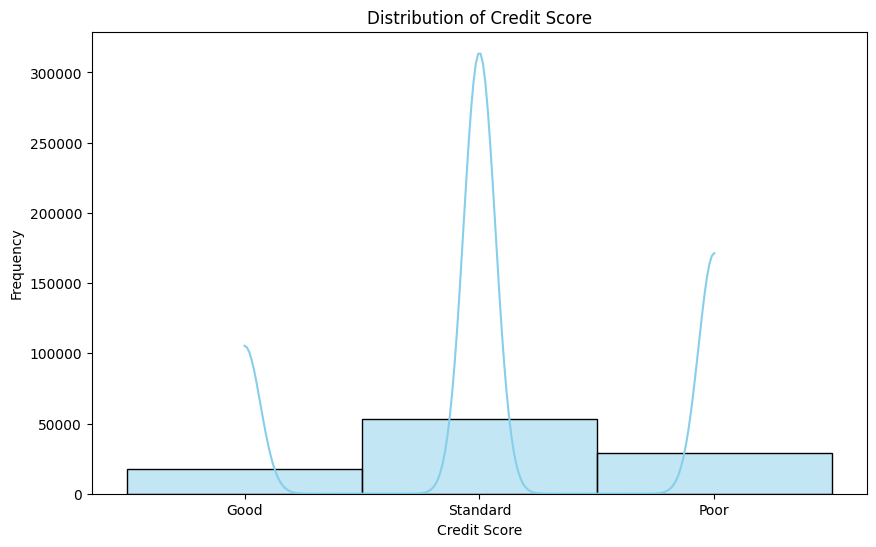

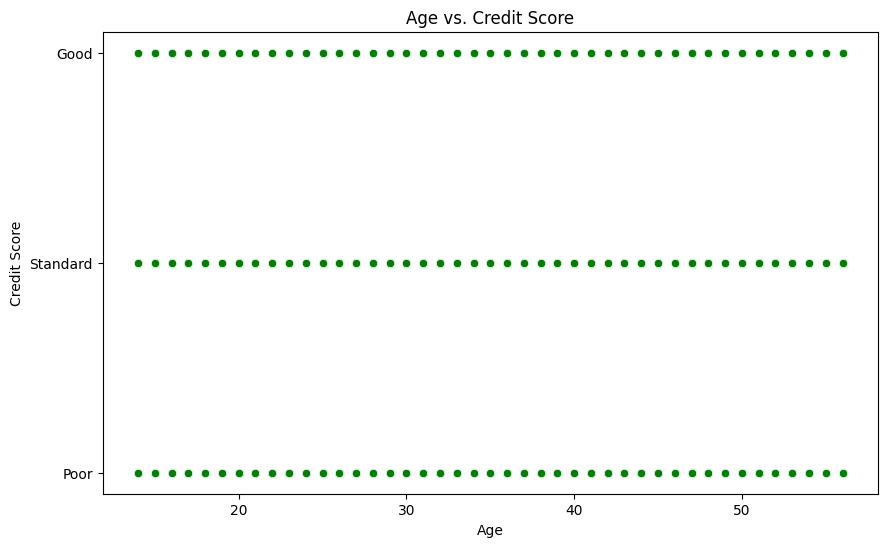

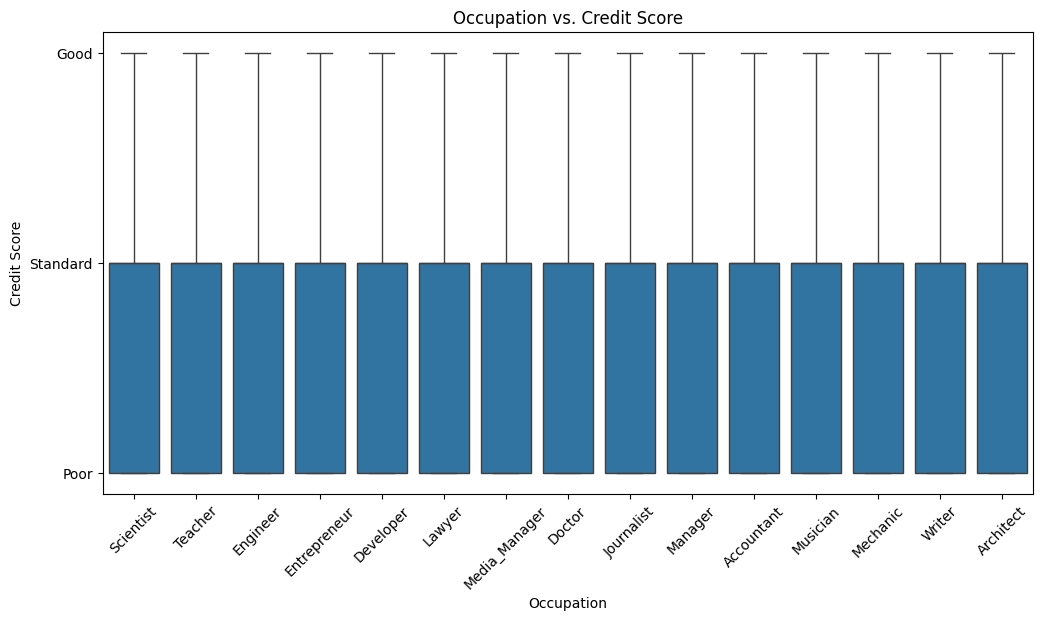

In [14]:
#Visualize the distribution of the credit score
plt.figure(figsize=(10, 6))
sns.histplot(data['Credit_Score'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

#Scatter plot of Age vs. Credit Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Credit_Score', color='green')
plt.title('Age vs. Credit Score')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.show()

#Box plot of Occupation vs. Credit Score
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Occupation', y='Credit_Score')
plt.title('Occupation vs. Credit Score')
plt.xlabel('Occupation')
plt.ylabel('Credit Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

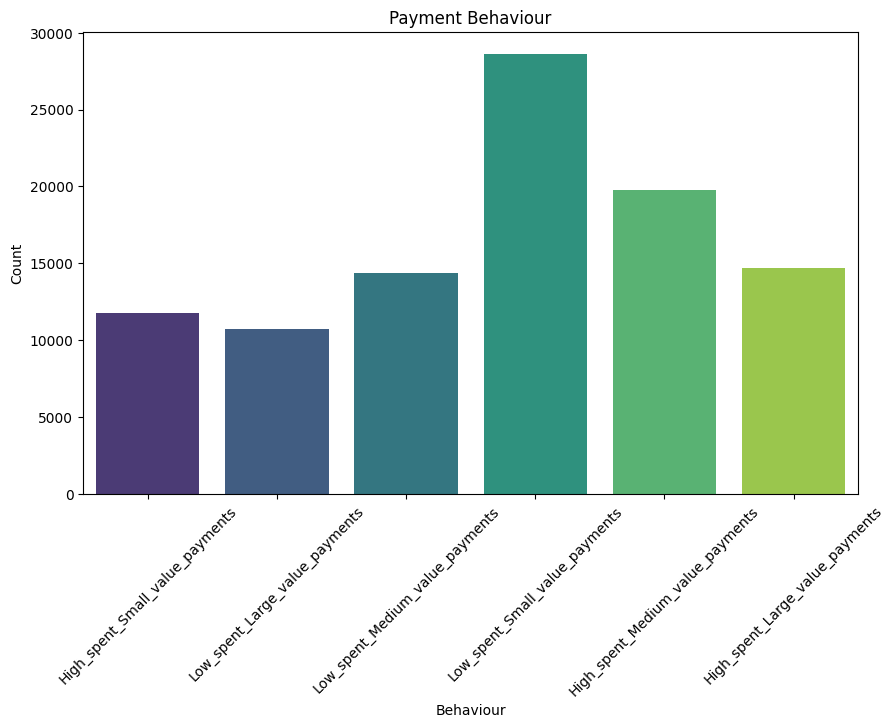

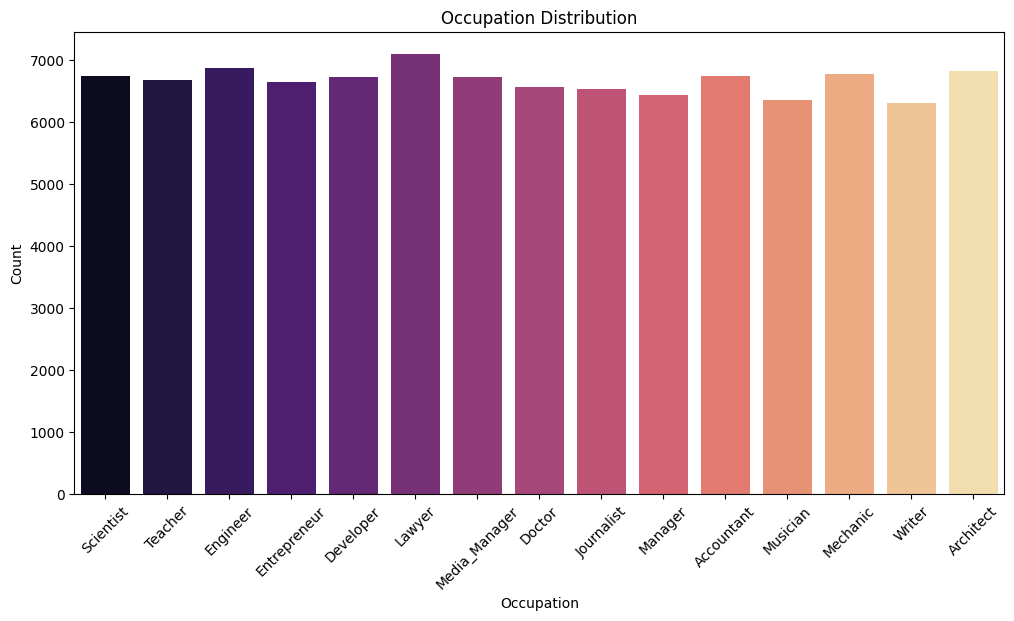

In [15]:
#Count plot of Payment Behaviour
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Payment_Behaviour', hue='Payment_Behaviour', palette='viridis', legend=False)
plt.title('Payment Behaviour')
plt.xlabel('Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#Bar plot of Occupation
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Occupation', hue='Occupation', palette='magma', legend=False)
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [16]:
data['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: Payment_Behaviour, dtype: int64

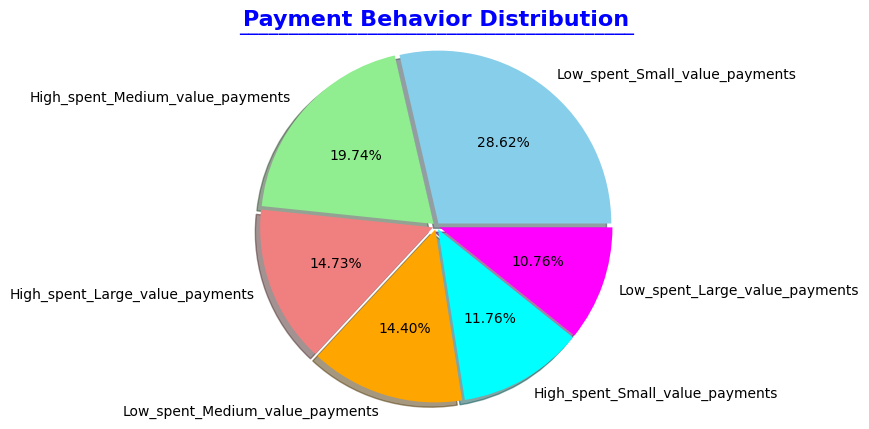

In [17]:
size = data['Payment_Behaviour'].value_counts()
labels = ['Low_spent_Small_value_payments', 'High_spent_Medium_value_payments','High_spent_Large_value_payments',
          'Low_spent_Medium_value_payments','High_spent_Small_value_payments','Low_spent_Large_value_payments']
color = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'cyan', 'magenta']
explode = [0.02, 0.02, 0.02, 0.02, 0.02, 0.02]

plt.figure(figsize = (5,5))
plt.pie(size, labels=labels, colors=color, explode=explode, autopct='%.2f%%', shadow = True)
plt.axis('equal')
plt.title('Payment Behavior Distribution', fontsize=16, fontweight='bold', color='blue')
plt.text(0.00, 1.16, '_' * 40, horizontalalignment='center', verticalalignment='center', fontsize=14, color='blue')
plt.show()

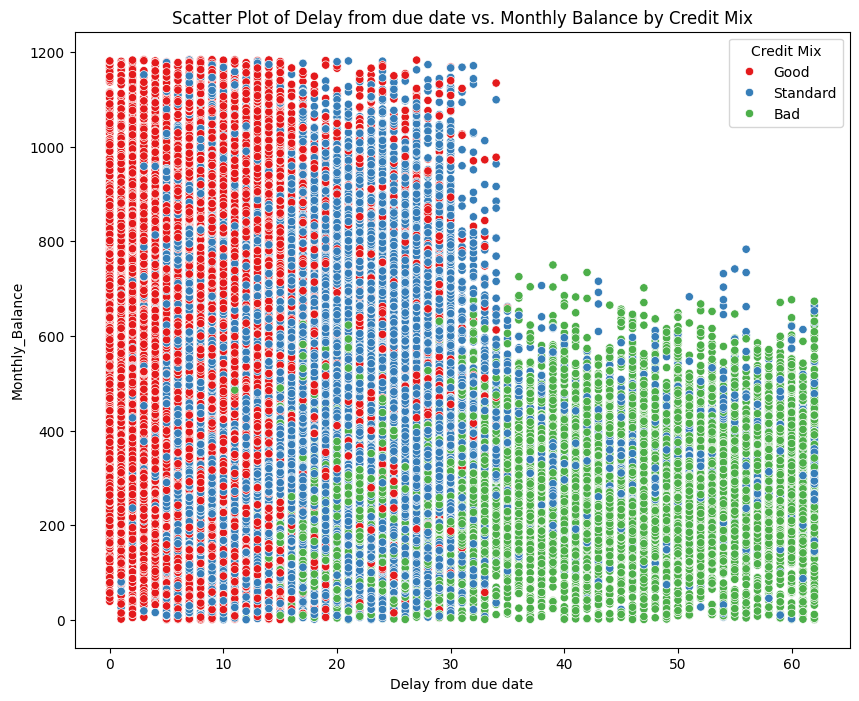

In [18]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='Delay_from_due_date', y='Monthly_Balance', hue='Credit_Mix', palette='Set1')
plt.title('Scatter Plot of Delay from due date vs. Monthly Balance by Credit Mix')
plt.xlabel('Delay from due date')
plt.ylabel('Monthly_Balance')
plt.legend(title='Credit Mix', loc='upper right')
plt.show()

## **Data Preprocessing**

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [20]:
data['Type_of_Loan'].value_counts()

No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday Loan, Mortgag

In [21]:
data['Type_of_Loan'].replace('No Data','Not Specified', inplace = True)

In [22]:
label_encoder = LabelEncoder()
data['Name'] = label_encoder.fit_transform(data['Name'])
data['Occupation'] = label_encoder.fit_transform(data['Occupation'])
data['Type_of_Loan'] = label_encoder.fit_transform(data['Type_of_Loan'])
data['Credit_Mix'] = label_encoder.fit_transform(data['Credit_Mix'])
data['Payment_of_Min_Amount'] = label_encoder.fit_transform(data['Payment_of_Min_Amount'])
data['Payment_Behaviour'] = label_encoder.fit_transform(data['Payment_Behaviour'])
data['Credit_Score'] = label_encoder.fit_transform(data['Credit_Score'])

In [23]:
# Statistics
#  ANOVA test
# Example: Comparing credit scores among different occupations
f_statistic, p_value = stats.f_oneway(*[group['Credit_Score'] for name, group in data.groupby('Occupation')])
print(f"\nANOVA p-value for occupation groups: {p_value}")

# Chi-square test
# Testing independence between occupation and payment behaviour
chi2_statistic, p_value, _, _ = stats.chi2_contingency(pd.crosstab(data['Occupation'], data['Payment_Behaviour']))
print(f"\nChi-square p-value for independence between occupation and payment behaviour: {p_value}")

# Pearson correlation coefficient
# Correlation between age and credit score
pearson_corr, pearson_p_value = stats.pearsonr(data['Age'], data['Credit_Score'])
print(f"\nPearson correlation coefficient between age and credit score: {pearson_corr}, p-value: {pearson_p_value}")

# Spearman rank correlation coefficient
# Correlation between monthly balance and credit score
spearman_corr, spearman_p_value = stats.spearmanr(data['Monthly_Balance'], data['Credit_Score'])
print(f"\nSpearman rank correlation coefficient between monthly balance and credit score: {spearman_corr}, p-value: {spearman_p_value}")


ANOVA p-value for occupation groups: 1.3162496390319872e-11

Chi-square p-value for independence between occupation and payment behaviour: 0.014037300779879004

Pearson correlation coefficient between age and credit score: -0.058922746312646934, p-value: 1.2871238197196371e-77

Spearman rank correlation coefficient between monthly balance and credit score: -0.012455743848313282, p-value: 8.183707154737623e-05




1.   ANOVA p-value for occupation groups: The p-value obtained from the ANOVA test is approximately 1.32×10−11 . ANOVA (Analysis of Variance) is a statistical test used to determine whether there are statistically significant differences between the means of three or more independent groups. In this case, it appears that there are significant differences between the means of different occupation groups. The extremely small p-value suggests strong evidence against the null hypothesis, indicating that at least one of the occupation group means is significantly different from the others.
2.   Chi-square p-value for independence between occupation and payment behavior: The chi-square test for independence assesses whether there is a significant association between two categorical variables. In this case, the variables are occupation and payment behavior. The obtained p-value is approximately 0.014. A p-value less than a chosen significance level (e.g., 0.05) indicates that there is evidence to reject the null hypothesis of independence. Therefore, there is some evidence to suggest that there is a relationship between occupation and payment behavior.

3.  Pearson correlation coefficient between age and credit score: The Pearson correlation coefficient measures the strength and direction of the linear relationship between two continuous variables. In this case, age and credit score are being correlated. The obtained correlation coefficient is approximately −0.059, indicating a weak negative correlation. Additionally, the p-value associated with this correlation is approximately 1.29×10 −77 , which is extremely small. This suggests strong evidence against the null hypothesis, indicating that there is a significant correlation between age and credit score.

4.  Spearman rank correlation coefficient between monthly balance and credit score: The Spearman rank correlation coefficient is a non-parametric measure of correlation that assesses the strength and direction of the monotonic relationship between two continuous or ordinal variables. In this case, monthly balance and credit score are being correlated. The obtained coefficient is approximately −0.012, indicating a very weak negative monotonic relationship. However, the associated p-value is approximately 8.18×10−5, which is small. This suggests evidence against the null hypothesis, indicating that there is a statistically significant correlation between monthly balance and credit score, albeit weak





<Axes: >

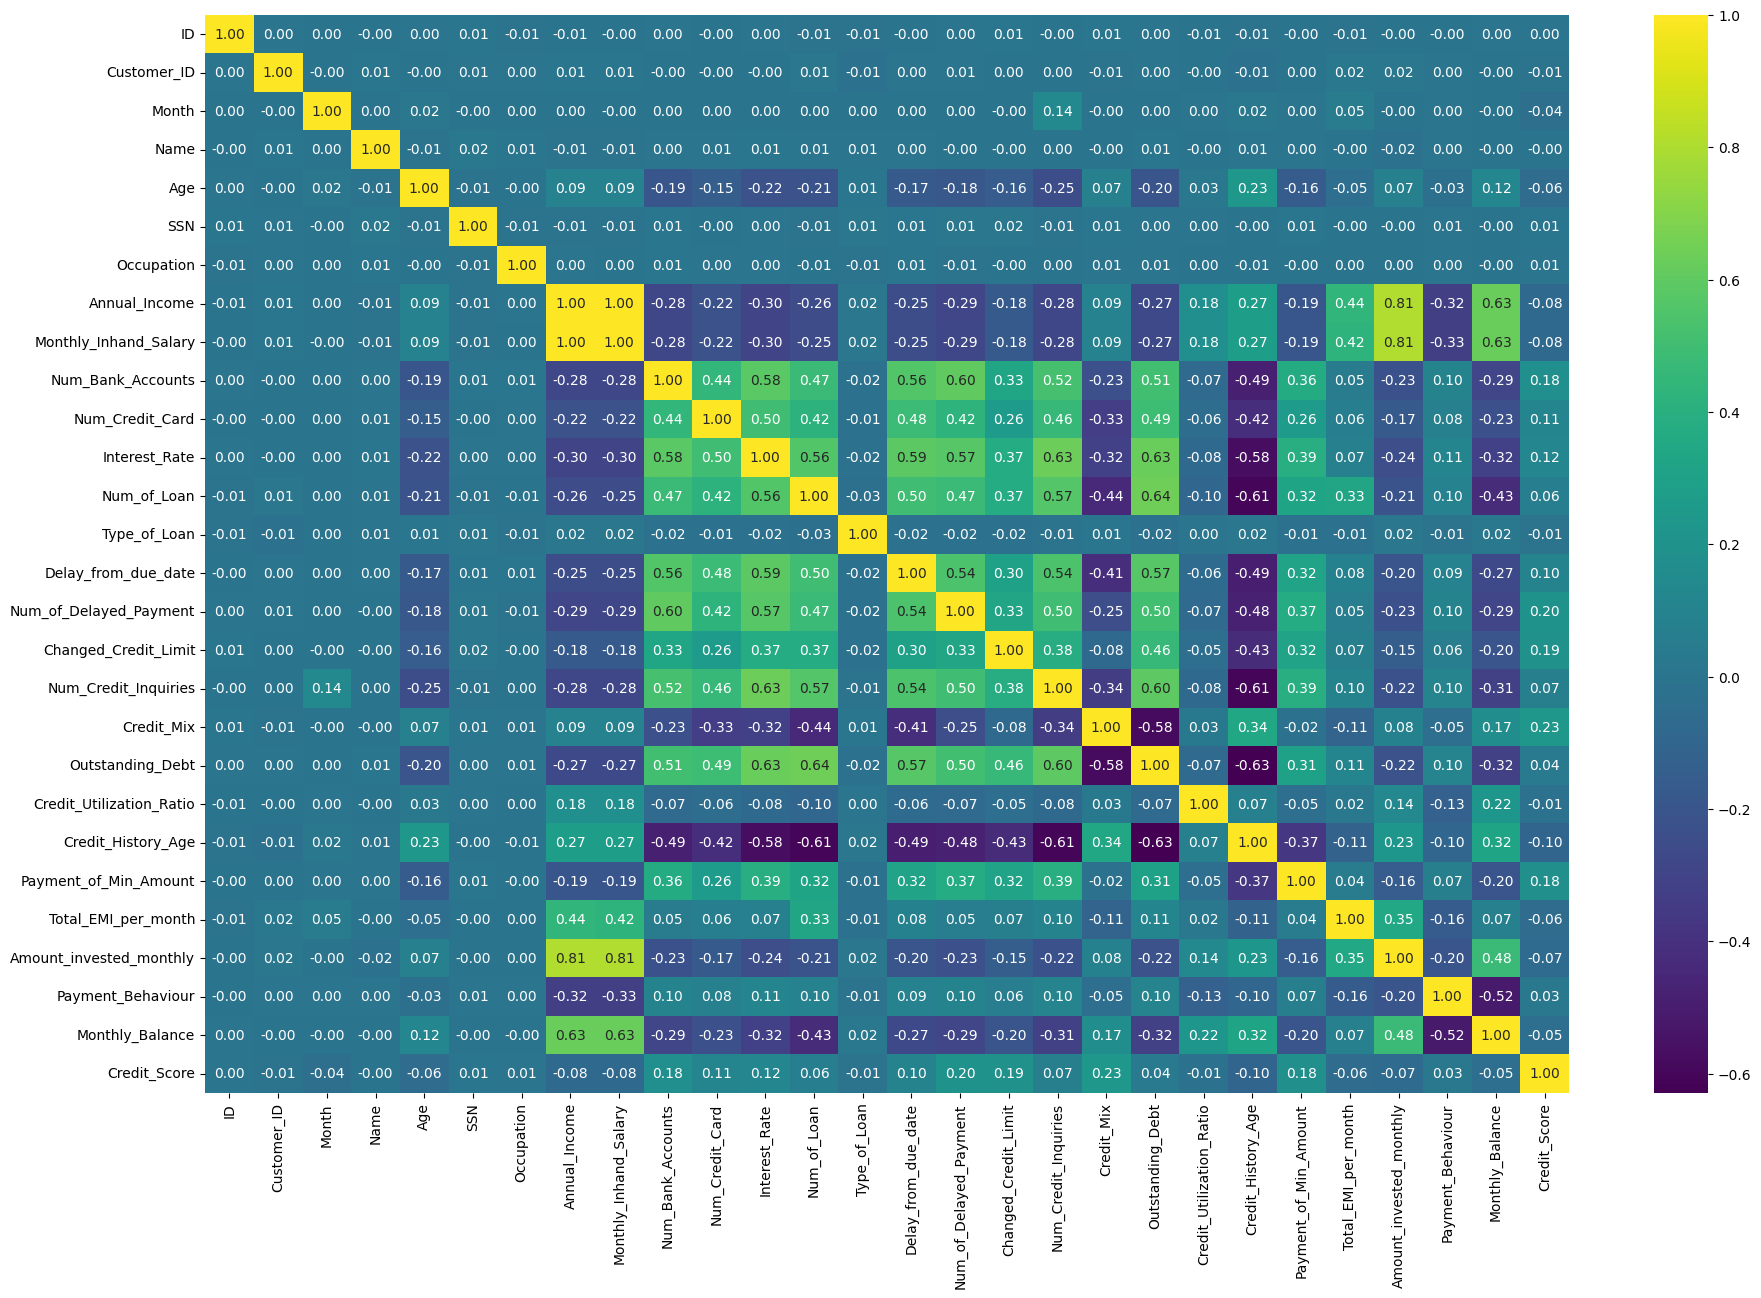

In [24]:
plt.figure(figsize = (22,14))
sns.heatmap(data.corr(), cmap='viridis', annot=True, fmt='.2f')

In [25]:
features = data[['Customer_ID', 'Month', 'Age', 'SSN', 'Occupation' , 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
                'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
                'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
                'Credit_Utilization_Ratio', 'Credit_History_Age',
                'Payment_of_Min_Amount', 'Total_EMI_per_month',
                'Amount_invested_monthly', 'Payment_Behaviour',
                'Credit_Score'
]]

In [26]:
features

,Customer_ID,Month,Age,SSN,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score
0,3392,1,23.0,821000265.0,12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,1,809.98,26.822620,265.0,1,49.574949,21.465380,2,0
1,3392,2,23.0,821000265.0,12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,1,809.98,31.944960,266.0,1,49.574949,21.465380,3,0
2,3392,3,23.0,821000265.0,12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,1,809.98,28.609352,267.0,1,49.574949,21.465380,4,0
3,3392,4,23.0,821000265.0,12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,1,809.98,31.377862,268.0,1,49.574949,21.465380,5,0
4,3392,5,23.0,821000265.0,12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,1,809.98,24.797347,269.0,1,49.574949,21.465380,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,78735990.0,9,3359.415833,4.0,6.0,7.0,2.0,...,3.0,1,502.38,34.663572,378.0,1,35.104023,24.028477,0,1
99996,37932,5,25.0,78735990.0,9,3359.415833,4.0,6.0,7.0,2.0,...,3.0,1,502.38,40.565631,379.0,1,35.104023,24.028477,1,1
99997,37932,6,25.0,78735990.0,9,3359.415833,4.0,6.0,7.0,2.0,...,3.0,1,502.38,41.255522,380.0,1,35.104023,24.028477,0,1
99998,37932,7,25.0,78735990.0,9,3359.415833,4.0,6.0,7.0,2.0,...,3.0,1,502.38,33.638208,381.0,1,35.104023,24.028477,3,2


In [27]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  int64  
 1   Month                     100000 non-null  int64  
 2   Age                       100000 non-null  float64
 3   SSN                       100000 non-null  float64
 4   Occupation                100000 non-null  int64  
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  float64
 10  Type_of_Loan              100000 non-null  int64  
 11  Delay_from_due_date       100000 non-null  float64
 12  Num_of_Delayed_Payment    100000 non-null  float64
 13  Changed_Credit_Limit      100000 non-null  fl

In [28]:
features['Credit_Mix'].value_counts()

2    45848
1    30384
0    23768
Name: Credit_Mix, dtype: int64

In [ ]:
scaler = StandardScaler()
features['Customer_ID'] = scaler.fit_transform(features['Customer_ID'].values.reshape(-1,1))
features['SSN'] = scaler.fit_transform(features['SSN'].values.reshape(-1,1))
features['Monthly_Inhand_Salary'] = scaler.fit_transform(features['Monthly_Inhand_Salary'].values.reshape(-1,1))
features['Type_of_Loan'] = scaler.fit_transform(features['Type_of_Loan'].values.reshape(-1,1))
features['Delay_from_due_date'] = scaler.fit_transform(features['Delay_from_due_date'].values.reshape(-1,1))
features['Outstanding_Debt'] = scaler.fit_transform(features['Outstanding_Debt'].values.reshape(-1,1))
features['Credit_Utilization_Ratio'] = scaler.fit_transform(features['Credit_Utilization_Ratio'].values.reshape(-1,1))
features['Total_EMI_per_month'] = scaler.fit_transform(features['Total_EMI_per_month'].values.reshape(-1,1))
features['Amount_invested_monthly'] = scaler.fit_transform(features['Amount_invested_monthly'].values.reshape(-1,1))


* ## **Creating the Train and Test dataset**

In [31]:
X = features.drop(['Credit_Score'],axis = 1)
y = features['Credit_Score']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=True)